In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from mpitree.decision_tree import DecisionTreeClassifier

np.random.seed = 42

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data[:, :2], iris.target, test_size=0.2, random_state=42
)

In [3]:
def plot_decision_tree_clf_boundary(clf, X, y, /, *, feature_names=None, lim=None):
    h = 0.02

    cmap_light = ListedColormap(["#4993c3", "#e73031", "#e3c471"])
    cmap_bold = ListedColormap(["#0000ec", "#ff0000", "#bfbf00"])

    if feature_names is None:
        feature_names = list(map(str, range(X.ndim)))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_t = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)

    Z = np.array([clf.predict(X_t.iloc[x]) for x in range(len(X_t))])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_bold,
        edgecolors="black",
        linewidths=1.5,
    )

    if lim is None:
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    else:
        plt.xlim(*lim[0])
        plt.ylim(*lim[1])

    plt.title("Decision Tree Classifier")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    plt.show()

In [4]:
clf = DecisionTreeClassifier(criterion={"max_depth": 3}).fit(X_train, y_train)
print(clf)

train_score, test_score = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

┌── 0
│  ├── 1 [< 5.45]
│  │  ├── 0 [< 2.80]
│  │  │  └── 0 [< 4.70]
│  │  │  └── 1 [>= 4.70]
│  │  ├── 0 [>= 2.80]
│  │  │  └── 0 [< 5.35]
│  │  │  └── 0 [>= 5.35]
│  ├── 1 [>= 5.45]
│  │  ├── 0 [< 3.90]
│  │  │  └── 1 [< 7.05]
│  │  │  └── 2 [>= 7.05]
│  │  └── 0 [>= 3.90]

Train-Test Accuracy: (75.00%, 63.33%)


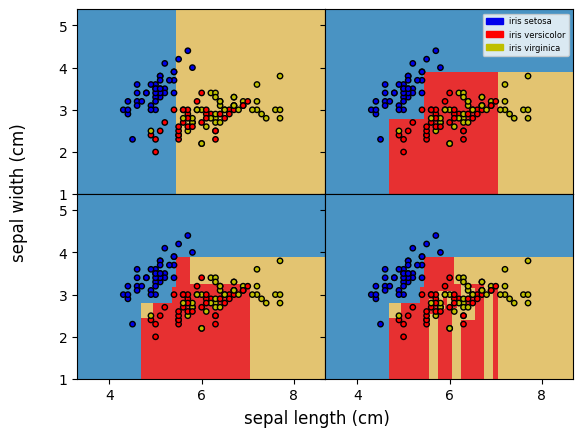

In [5]:
h = 0.02  # step size in the mesh

a = "#4993c3"
b = "#e73031"
c = "#e3c471"

aa = "#0000ec"
bb = "#ff0000"
cc = "#bfbf00"

# Create color maps
cmap_light = ListedColormap([a, b, c])
cmap_bold = ListedColormap([aa, bb, cc])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex="col", sharey="row")

depths = [1, 3, 5, np.inf]
coor = [ax1, ax2, ax3, ax4]

for depth, ax in zip(depths, coor):
    clf = DecisionTreeClassifier(criterion={"max_depth": depth}).fit(X_train, y_train)

    x_min, x_max = (
        X_train[:, 0].min() - 1,
        X_train[:, 0].max() + 1,
    )
    y_min, y_max = (
        X_train[:, 1].min() - 1,
        X_train[:, 1].max() + 1,
    )
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_t = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["0", "1"])
    Z = np.array([clf.predict(X_t.iloc[x]) for x in range(len(X_t))])

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ax.scatter(
        X_train[:, 0],
        X_train[:, 1],
        c=y_train,
        cmap=cmap_bold,
        s=15,
        edgecolors="black",
        label=f"Depth={depth}",
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    if depth == 3:
        patches = [
            mpatches.Patch(color=aa, label="iris setosa"),
            mpatches.Patch(color=bb, label="iris versicolor"),
            mpatches.Patch(color=cc, label="iris virginica"),
        ]
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=patches, prop={"size": 6})

fig.supxlabel("sepal length (cm)")
fig.supylabel("sepal width (cm)")

plt.show()

In [6]:
X, y = make_moons(n_samples=1000, noise=0.065, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print(clf)

train_score, test_score = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

┌── 1
│  ├── 0 [< 0.52]
│  │  └── 0 [< -0.47]
│  │  ├── 1 [>= -0.47]
│  │  │  └── 1 [< -0.10]
│  │  │  ├── 0 [>= -0.10]
│  │  │  │  ├── 0 [< 1.41]
│  │  │  │  │  └── 1 [< 0.56]
│  │  │  │  │  └── 0 [>= 0.56]
│  │  │  │  └── 1 [>= 1.41]
│  ├── 1 [>= 0.52]
│  │  ├── 0 [< 0.54]
│  │  │  ├── 1 [< 1.47]
│  │  │  │  └── 0 [< 0.53]
│  │  │  │  └── 1 [>= 0.53]
│  │  │  └── 1 [>= 1.47]
│  │  └── 0 [>= 0.54]

Train-Test Accuracy: (100.00%, 99.00%)


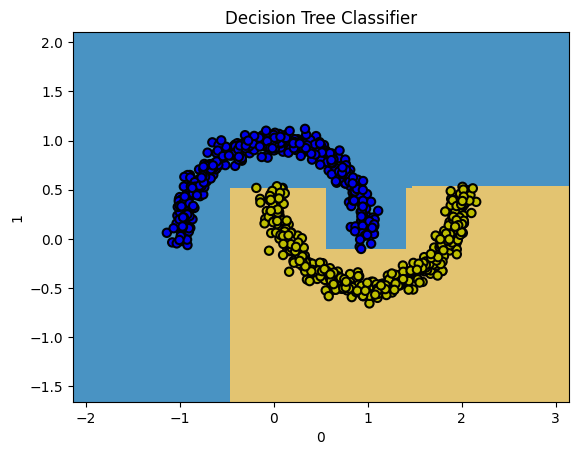

In [8]:
plot_decision_tree_clf_boundary(clf, X_train, y_train)
# ..ref: https://www.ibm.com/docs/en/pessl/5.3.0?topic=distributions-distribution-techniques